In [1]:
#packages for data analysis

import numpy as np
import pandas as pd
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as se; se.set(font_scale = 1.2)

%matplotlib inline 


In [5]:
df = pd.read_csv("Muffins_Cupcakes.csv")

In [6]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [7]:
df.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


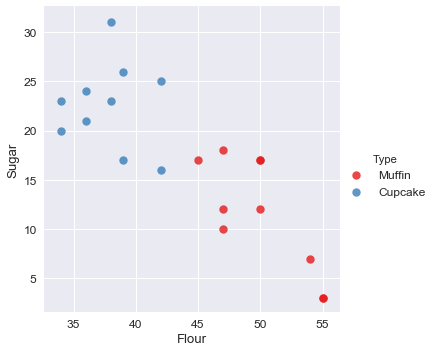

In [9]:
#plot the data

se.lmplot(data = df, x = "Flour", y = "Sugar", hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})

In [10]:
#format or preprocess the data

type_label = np.where(df['Type']=='Muffin',0,1) 

#Creating a numpy array by givin the condition to the "Type" if its MUFFIN then the label is [0] else(i.e Cupcake) it'll be [1] 
#This basically we are working on our training data, this is what we are gonna train it with i.e. 0 or 1, whether its a MUFFIN
#or its NOT (i.e. its a CUPCAKE)

df_features = df.columns.values[1:].tolist() 
#Now here we want all the features apart from dependent variable which is our 'Type' column, so we will ignore that and print
#our remaining features from [1:], after ":", blank means till the end and then create a list of the same.  

print("Available features are:", df_features)

Available features are: ['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


In [11]:
# Now lets say we want the actual values of the ingredients  (here we are considering 2 ingredients which are Flour and Sugar)
ingreds = df[['Flour','Sugar']].values
print("Ingredients are: \n", ingreds)

#It gives us the amount of Flour and Sugar from our dataframe-

Ingredients are: 
 [[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [12]:
#We can also get the values of all the Ingredients

ing_all = df[df_features].values
print("All listed Ingredients are: \n", ing_all)

#If we take all the independent variables then we have to build 8 different hyperplanes for each individual features. 

All listed Ingredients are: 
 [[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


In [13]:
#But again here we are mainly focusing or considering the values of Flour and Sugar only (2 dimensions) !

ingreds = df[['Flour','Sugar']].values
print("Ingredients are: \n", ingreds)


#Because we are focusing on Supervised LINEAR CLASSIFICATION for SVM.

Ingredients are: 
 [[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [14]:
#Fit the model [Support Vector Machine]

model = svm.SVC(kernel = 'linear')
model.fit(ingreds,type_label)      #fitting with "Flour,Sugar" and type_label i.e. "Muffin or Cupcake"


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
#get the separating hyperplane

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

#plot the paralles to the separating hyperplane that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


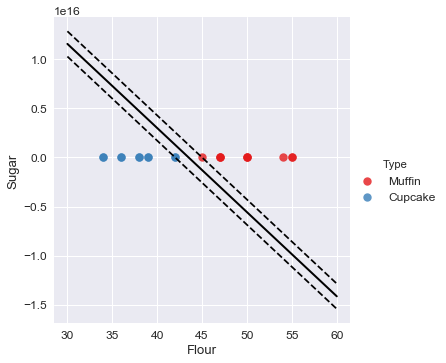

In [16]:
se.lmplot('Flour', 'Sugar', data = df, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})

plt.plot(xx, yy, linewidth = 2, color = 'black')

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [17]:
#Create a function to create a Muffin or Cupcake:

def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("You are looking at a Muffin Recipe!")
    else:
        print("You are looking at a Cupcake Recipe!")

In [18]:
muffin_or_cupcake(50,20)

You are looking at a Muffin Recipe!


In [19]:
muffin_or_cupcake(43.5,56)

You are looking at a Cupcake Recipe!


In [20]:
#Repeat the same process from 11th tab for "Flour" and "Milk"

ingred2 = df[['Flour','Milk']].values
print("Next set of ingredients are:\n", ingred2)

Next set of ingredients are:
 [[55 28]
 [47 24]
 [47 23]
 [45 11]
 [50 25]
 [55 27]
 [54 27]
 [47 26]
 [50 17]
 [50 17]
 [39  0]
 [42 21]
 [34 17]
 [39 13]
 [38 15]
 [42 18]
 [36 14]
 [38 15]
 [36 16]
 [34 17]]


In [21]:
#Fit the model (SVM)

model = svm.SVC(kernel='linear')
model.fit(ingred2,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
#get the separating hyperplane

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]
print(yy)
#plot the paralles to the separating hyperplane that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


[-86.75229963 -82.16046289 -77.56862616 -72.97678942 -68.38495269
 -63.79311595 -59.20127922 -54.60944248 -50.01760575 -45.42576901
 -40.83393228 -36.24209554 -31.65025881 -27.05842208 -22.46658534
 -17.87474861 -13.28291187  -8.69107514  -4.0992384    0.49259833
   5.08443507   9.6762718   14.26810854  18.85994527  23.45178201
  28.04361874  32.63545548  37.22729221  41.81912894  46.41096568
  51.00280241  55.59463915  60.18647588  64.77831262  69.37014935
  73.96198609  78.55382282  83.14565956  87.73749629  92.32933303
  96.92116976 101.5130065  106.10484323 110.69667997 115.2885167
 119.88035343 124.47219017 129.0640269  133.65586364 138.24770037]


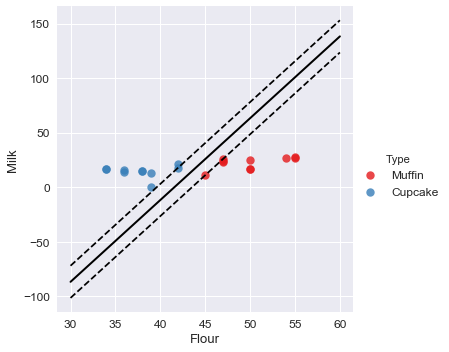

In [23]:
se.lmplot('Flour', 'Milk', data = df, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})

plt.plot(xx, yy, linewidth = 2, color = 'black')

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [24]:
#Create a function to create a Muffin or Cupcake:

def muffin_or_cupcake(flour,milk):
    if(model.predict([[flour,milk]]))==0:
        print("You are looking at a Muffin Recipe!")
    else:
        print("You are looking at a Cupcake Recipe!")

In [25]:
muffin_or_cupcake(40,20)

You are looking at a Cupcake Recipe!


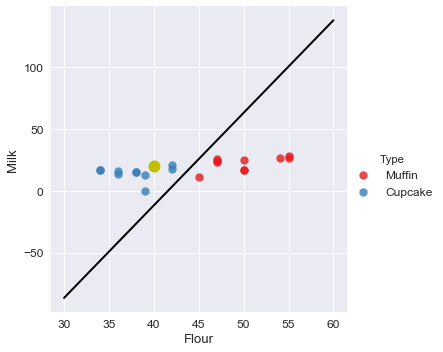

In [26]:
#Lets plot this one:

se.lmplot('Flour', 'Milk', data = df, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})

plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(40,20,'yo',markersize = '12')                 #yo is for yellow color

In [27]:
print("""So here we have built a classifier using SVM which is able to classify if a recipe is of a Cupcake or a Muffin""")

So here we have built a classifier using SVM which is able to classify if a recipe is of a Cupcake or a Muffin
